___

<a href='https://www.udemy.com/user/joseportilla/'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright by Pierian Data Inc.</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# KNN Project Exercise 

Due to the simplicity of KNN for Classification, let's focus on using a PipeLine and a GridSearchCV tool, since these skills can be generalized for any model.


## The Sonar Data 

### Detecting a Rock or a Mine

Sonar (sound navigation ranging) is a technique that uses sound propagation (usually underwater, as in submarine navigation) to navigate, communicate with or detect objects on or under the surface of the water, such as other vessels.

<img src="sonar.jpg"  style="max-height: 500px; max-width: 500px;">

The data set contains the response metrics for 60 separate sonar frequencies sent out against a known mine field (and known rocks). These frequencies are then labeled with the known object they were beaming the sound at (either a rock or a mine). 

<img src="mine.jpg"  style="max-height: 500px; max-width: 500px;">

Our main goal is to create a machine learning model capable of detecting the difference between a rock or a mine based on the response of the 60 separate sonar frequencies.


Data Source: https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+(Sonar,+Mines+vs.+Rocks)

### Complete the Tasks in bold

**TASK: Run the cells below to load the data.**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('sonar.all-data.csv')

In [3]:
df.head()

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60,Label
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [4]:
df.sample(11)

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60,Label
43,0.0093,0.0269,0.0217,0.0339,0.0305,0.1172,0.1450,0.0638,0.0740,0.1360,...,0.0212,0.0091,0.0056,0.0086,0.0092,0.0070,0.0116,0.0060,0.0110,R
44,0.0257,0.0447,0.0388,0.0239,0.1315,0.1323,0.1608,0.2145,0.0847,0.0561,...,0.0096,0.0153,0.0096,0.0131,0.0198,0.0025,0.0199,0.0255,0.0180,R
19,0.0126,0.0149,0.0641,0.1732,0.2565,0.2559,0.2947,0.4110,0.4983,0.5920,...,0.0092,0.0035,0.0098,0.0121,0.0006,0.0181,0.0094,0.0116,0.0063,R
159,0.0235,0.0220,0.0167,0.0516,0.0746,0.1121,0.1258,0.1717,0.3074,0.3199,...,0.0221,0.0152,0.0083,0.0058,0.0023,0.0057,0.0052,0.0027,0.0021,M
24,0.0293,0.0644,0.0390,0.0173,0.0476,0.0816,0.0993,0.0315,0.0736,0.0860,...,0.0035,0.0052,0.0083,0.0078,0.0075,0.0105,0.0160,0.0095,0.0011,R
182,0.0095,0.0308,0.0539,0.0411,0.0613,0.1039,0.1016,0.1394,0.2592,0.3745,...,0.0181,0.0019,0.0102,0.0133,0.0040,0.0042,0.0030,0.0031,0.0033,M
197,0.0366,0.0421,0.0504,0.0250,0.0596,0.0252,0.0958,0.0991,0.1419,0.1847,...,0.0132,0.0027,0.0022,0.0059,0.0016,0.0025,0.0017,0.0027,0.0027,M
95,0.0291,0.0400,0.0771,0.0809,0.0521,0.1051,0.0145,0.0674,0.1294,0.1146,...,0.0056,0.0237,0.0204,0.0050,0.0137,0.0164,0.0081,0.0139,0.0111,R
188,0.0089,0.0274,0.0248,0.0237,0.0224,0.0845,0.1488,0.1224,0.1569,0.2119,...,0.0096,0.0103,0.0093,0.0025,0.0044,0.0021,0.0069,0.0060,0.0018,M
207,0.0260,0.0363,0.0136,0.0272,0.0214,0.0338,0.0655,0.1400,0.1843,0.2354,...,0.0146,0.0129,0.0047,0.0039,0.0061,0.0040,0.0036,0.0061,0.0115,M


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Freq_1   208 non-null    float64
 1   Freq_2   208 non-null    float64
 2   Freq_3   208 non-null    float64
 3   Freq_4   208 non-null    float64
 4   Freq_5   208 non-null    float64
 5   Freq_6   208 non-null    float64
 6   Freq_7   208 non-null    float64
 7   Freq_8   208 non-null    float64
 8   Freq_9   208 non-null    float64
 9   Freq_10  208 non-null    float64
 10  Freq_11  208 non-null    float64
 11  Freq_12  208 non-null    float64
 12  Freq_13  208 non-null    float64
 13  Freq_14  208 non-null    float64
 14  Freq_15  208 non-null    float64
 15  Freq_16  208 non-null    float64
 16  Freq_17  208 non-null    float64
 17  Freq_18  208 non-null    float64
 18  Freq_19  208 non-null    float64
 19  Freq_20  208 non-null    float64
 20  Freq_21  208 non-null    float64
 21  Freq_22  208 non

## Data Exploration

**TASK: Create a heatmap of the correlation between the difference frequency responses.**

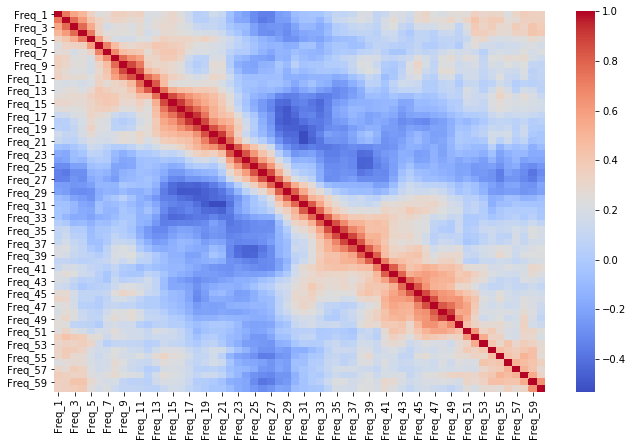

In [6]:
plt.figure(figsize=(11,7))
sns.heatmap(df.corr(),cmap='coolwarm');

**TASK: What are the top 5 correlated frequencies with the target\label?**

*Note: You many need to map the label to 0s and 1s.*

*Additional Note: We're looking for **absolute** correlation values.*

In [7]:
df['Target'] = df['Label'].map({'R':0,'M':1})

In [8]:
np.abs(df.corr()['Target']).sort_values().tail(6)

Freq_45    0.339406
Freq_10    0.341142
Freq_49    0.351312
Freq_12    0.392245
Freq_11    0.432855
Target     1.000000
Name: Target, dtype: float64

## Train | Test Split

Our approach here will be one of using Cross Validation on 90% of the dataset, and then judging our results on a final test set of 10% to evaluate our model.

**TASK: Split the data into features and labels, and then split into a training set and test set, with 90% for Cross-Validation training, and 10% for a final test set.**

*Note: The solution uses a random_state=42*

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X = df.drop(['Target','Label'],axis=1)
y = df['Label']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

**TASK: Create a PipeLine that contains both a StandardScaler and a KNN model**

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

In [13]:
scaler = StandardScaler()

In [14]:
knn =  KNeighborsClassifier()

In [15]:
operations = [("scaler", scaler), ("knn", knn)]

In [16]:
Pipeline(steps=operations)

Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

In [17]:
pipe = Pipeline(steps=operations)

In [18]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

**TASK: Perform a grid-search with the pipeline to test various values of k and report back the best performing parameters.**

In [19]:
from sklearn.model_selection import GridSearchCV

In [20]:
k_values = range(1,30)

In [21]:
param_grid = {'knn__n_neighbors': k_values}

In [22]:
pipe_grid = GridSearchCV(pipe, param_grid, cv=10, scoring= 'accuracy')

In [23]:
pipe_grid.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': range(1, 30)}, scoring='accuracy')

In [24]:
pipe_grid.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=1))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=1),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 1,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [25]:
pd.DataFrame(pipe_grid.cv_results_).iloc[:,4:].head()

,param_knn__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,1,{'knn__n_neighbors': 1},0.894737,0.947368,0.684211,0.789474,0.736842,1.000000,0.947368,0.888889,0.833333,0.888889,0.861111,0.094596,1
1,2,{'knn__n_neighbors': 2},0.894737,0.894737,0.736842,0.842105,0.789474,0.894737,0.684211,0.833333,0.888889,0.833333,0.829240,0.069122,2
2,3,{'knn__n_neighbors': 3},0.947368,0.894737,0.736842,0.789474,0.736842,0.842105,0.789474,0.888889,0.777778,0.777778,0.818129,0.068020,3
3,4,{'knn__n_neighbors': 4},0.894737,0.842105,0.736842,0.631579,0.736842,0.842105,0.684211,0.777778,0.833333,0.722222,0.770175,0.078122,7
4,5,{'knn__n_neighbors': 5},0.894737,0.894737,0.684211,0.631579,0.736842,0.842105,0.684211,0.777778,0.888889,0.777778,0.781287,0.091804,4


**(HARD) TASK: Using the .cv_results_ dictionary, see if you can create a plot of the mean test scores per K value.**

In [26]:
pipe_grid.cv_results_['mean_test_score']

array([0.86111111, 0.82923977, 0.81812865, 0.77017544, 0.78128655,
       0.78128655, 0.77602339, 0.75438596, 0.76023392, 0.73830409,
       0.71754386, 0.67368421, 0.70643275, 0.67397661, 0.71140351,
       0.68450292, 0.71169591, 0.69502924, 0.69532164, 0.7002924 ,
       0.70614035, 0.70526316, 0.70555556, 0.70555556, 0.7005848 ,
       0.68947368, 0.69473684, 0.68391813, 0.67865497])

In [27]:
pipe_grid.cv_results_['std_test_score']

array([0.09459641, 0.06912221, 0.06802002, 0.07812218, 0.09180355,
       0.07521841, 0.10219037, 0.07430583, 0.08082032, 0.08532052,
       0.08271495, 0.07738546, 0.07377698, 0.05959822, 0.07174237,
       0.06902629, 0.07875437, 0.07669574, 0.08975037, 0.0907399 ,
       0.10511076, 0.10346746, 0.09987895, 0.10587905, 0.09213264,
       0.10646488, 0.09650186, 0.10864019, 0.09916075])

Text(0, 0.5, 'Accuracy')

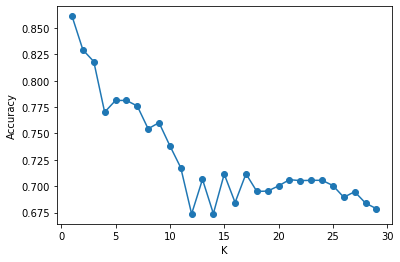

In [28]:
scores = pipe_grid.cv_results_['mean_test_score']
plt.plot(k_values,scores,'o-')
plt.xlabel("K")
plt.ylabel("Accuracy")

### Final Model Evaluation

**TASK: Using the grid classifier object from the previous step, get a final performance classification report and confusion matrix.**

In [29]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [30]:
y_pred = pipe_grid.predict(X_test) 

In [31]:
confusion_matrix(y_test,y_pred)

array([[12,  1],
       [ 1,  7]], dtype=int64)

In [32]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           M       0.92      0.92      0.92        13
           R       0.88      0.88      0.88         8

    accuracy                           0.90        21
   macro avg       0.90      0.90      0.90        21
weighted avg       0.90      0.90      0.90        21



### Great Job!